In [1]:
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pathlib import Path


# Create a Path object that represents the directory containing get_data.py
module_path = Path('pipelines/util')

# Convert the relative path to an absolute path and add it to sys.path
sys.path.append(str(module_path.resolve()))



# 0. Machine Learning Basics

Machine Learning is the study of computer algorithms that improve automatically through experience - Machine Learning, Tom Mitchell, McGraw Hill, 1997

#### Different types of machine learning:
-  Supervised Learning
    - eg. Regression, Classification
- Unsupervised Learning
    - eg. Clustering, Decision Tree
- Semi-Supervised Learning
- Reinforcement Learning

Interview Question: What's the difference between supervised and unsupervised learning?

#### A Typical Machine Learning Pipeline:
<img src="images/machine_learning_pipeline.png" />

Interview Question: What is a training/validation/test set?

# 1. Data

### 1.1 Load/Import Data

In [6]:
trades = pd.read_csv(r'D:\Junior\Summer Project\reabouttaqproject\AAPL_trades.csv')
quotes = pd.read_csv(r'D:\Junior\Summer Project\reabouttaqproject\AAPL_quotes.csv')

In [7]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283504 entries, 0 to 283503
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0.1                            283504 non-null  int64  
 1   Unnamed: 0                              283504 non-null  int64  
 2   Time                                    283504 non-null  object 
 3   Date                                    283504 non-null  object 
 4   Exchange                                283504 non-null  object 
 5   Symbol                                  283504 non-null  object 
 6   Trade_Volume                            283504 non-null  int64  
 7   Trade_Price                             283504 non-null  float64
 8   Sale_Condition                          283504 non-null  object 
 9   Source_of_Trade                         283504 non-null  object 
 10  Trade_Stop_Stock_Indicator              0 no

|Trades Data|Description|
|---|---|
|Unnamed: 0 | dummy index |
|Time| Time the trade was published by SIP|
|Date| Date the trade was published |
|Exchange| The ID of the exchange where the trade took place|
|Symbol| Stock Symbol|
|Trade_Volume | The number of shares traded |
|Trade_Price | The share price of this trade |
|Sale_Condition | The special condition associated with the trade|
|Source_of_Trade | CTA/UTP |
|Trade_Stop_Stock_Indicator | CTA |
|Trade_Correction_Indicator |  |
|Sequence_Number | Message sequence number |
|Trade_Id | Identifier for tracking Trades. Unique per participant per symbol per session within a trading session |
|Trade_Reporting_Facility | The ID of the Trade Reporting Facility |
|Participant_Timestamp | Time when the trade was reported|
|Trade_Reporting_Facility_TRF_Timestamp | If from an Exchange or if the FINRA ADF does not have a proprietary quotation feed, then will be set to blank. If the FINRA ADF or a FINRA TRF provides a proprietary feed of its quotation information, then it’s set to be the time of the quotation|
|Trade_Through_Exempt_Indicator | Denotes whether or not a trade is exempt from Trade Through rules |

|Quotes Data|Description|
|---|---|
|Unnamed: 0 |  |
|Time| Time the quote was published by SIP|
|Exchange|The exchange that issued the quote |
|Symbol| Stock Symbol|
|Bid_Price | The highest price any buyer is willing to pay for shares of this security |
|Bid_Size | The maximum number of shares the highest bidder is willing to buy |
|Offer_Price |The lowest price any seller is willing to take for shares of this security |
|Offer_Size | The maximum number of shares available at the offer price|
|Quote_Condition | Determines whether a quote qualifies for the Best Bid and Best Offer calculation |
|Sequence_Number | message sequence numbers|
|National_BBO_Indicator | The effect this quote has on the NBBO |
|FINRA_BBO_Indicator | Indicates the effect this quote has on the FINRA BBO |
|FINRA_ADF_MPID_Indicator | Denotes  the type of appendage to be included |
|Quote_Cancel_Correction | Indicates that this record is a cancel or a correction of a previous quote|
|Source_Of_Quote | CTA or UTP |
|Retail_Interest_Indicator | Indicates the presence of Retail Price Improvement (RPI) interest between the Bid and the Offer |
|Short_Sale_Restriction_Indicator | Short Sale Restriction status |
|LULD_BBO_Indicator |  |
|SIP_Generated_Message_Identifier | Originator of the message |
|NBBO_LULD_Indicator | LULD Limit Price Band effect on the NBB and NBO |
|Participant_Timestamp | Time the quote was published by the Participant to the SIP |
|FINRA_ADF_Timestamp | A FINRA ADF- or a FINRA TRF-provided timestamp |
|FINRA_ADF_Market_Participant_Quote_Indicator | UTP - FINRA ADF Market Participant Quote Indicator representing the Top of book quotations for each FINRA ADF participant |
|Security_Status_Indicator |  |
|Date |  |
|YearMonth|  |

Note: All column information of trades and quotes data and valid entries for each column can be found at https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
trades.head()

,Unnamed: 0.1,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
0,0,0,2020-01-02 04:00:00.064010,2020-01-02,P,AAPL,3801,295.05,@ T,N,NaN,0,1185,1,,40000063617792,NaN,1
1,1,1,2020-01-02 04:00:02.828485,2020-01-02,P,AAPL,1,295.08,@FTI,N,NaN,0,1195,2,,40002828108800,NaN,1
2,2,2,2020-01-02 04:00:06.250392,2020-01-02,Q,AAPL,6,295.25,@ TI,N,NaN,0,1197,1,,40006250366823,NaN,0
3,3,3,2020-01-02 04:00:06.429757,2020-01-02,P,AAPL,1,295.08,@ TI,N,NaN,0,1198,3,,40006429377792,NaN,0
4,4,4,2020-01-02 04:00:28.894835,2020-01-02,P,AAPL,3,295.10,@ TI,N,NaN,0,1205,4,,40028894459136,NaN,0


In [10]:
quotes.head()

,Unnamed: 0.1,Unnamed: 0,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,0,0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,1,1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2,2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,3,3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,4,4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


### 1.2 Data Visualization & Preliminary Analysis

In [11]:
from generators import *

In [12]:
plot_data = quotes.copy()
plot_data.drop(["Unnamed: 0"], axis=1, inplace=True)
plot_data.head()

,Unnamed: 0.1,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [13]:
converted_PTS = convertParticipantTimestamp(plot_data['Participant_Timestamp'], plot_data["Date"])

In [14]:
plot_data.set_index(converted_PTS, inplace=True)

In [15]:
plot_data.head()

,Unnamed: 0.1,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
2020-01-02 04:00:00.064785,0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064787,1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064790,2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065302,3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065358,4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [15]:
hours = plot_data.index.strftime("%H")

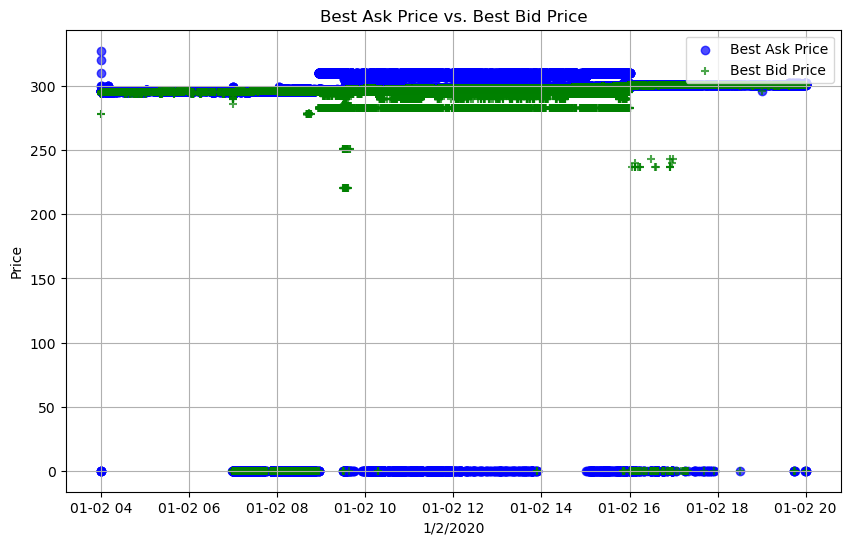

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data.index, plot_data['Offer_Price'], label='Best Ask Price', color='blue', alpha=0.7, marker='o')
plt.scatter(plot_data.index, plot_data['Bid_Price'], label='Best Bid Price', color='green', alpha=0.7, marker='+')
plt.grid(True)
plt.xlabel('1/2/2020')
plt.ylabel('Price')
plt.title('Best Ask Price vs. Best Bid Price')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Data Cleaning

Before we move towards feature generation and building machine learning models, we have to clean the dataset. The necessary steps to clean the trades and quotes data include:
1. Get rid of unnecessary columns.
2. Get rid of the invalid trades and quotes.
3. Event reconstruction.
4. Only keep the natural best bid/offer or last MQU.
5. Assign Last Active Quote and assign to the corresponding trade.

## SCIKIT-LEARN DESIGN

https://arxiv.org/pdf/1309.0238.pdf

Scikit-Learn’s API is remarkably well designed. These are the main design components of Scikit-Learn.

All objects share a consistent and simple interface:

### Estimators

Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

### Transformers

Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called fit_transform(), which is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).


### Predictors

Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### ...

Reference to the base classes for all estimators in scikit-learn can be found at: https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/base.py#L153

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sortedcollections import OrderedSet
import time

In [17]:
class CleanData(BaseEstimator, TransformerMixin):
    
    def __init__(self, dropped_after_hourse=True, droped_irregular_hours=True):
        self.dropped_after_hourse = dropped_after_hourse
        self.droped_irregular_hours = droped_irregular_hours
        
    
    def fit(self, X, y=None):
        if 'Participant_Timestamp' and 'Date' in X.columns:
            self.part_timestamp = convertParticipantTimestamp(X['Participant_Timestamp'], X['Date'])
        else:
            self.part_timestamp = X['Participant_Timestamp']
        return self
    
    
    def transform(self, X):    
        
        # remove rows of all NA
        X = X.dropna(axis=0, how="all")
        X.drop(['Unnamed: 0','Time', 'Date', 'YearMonth'], axis=1, inplace=True, errors='ignore')
        X['Participant_Timestamp'] = self.part_timestamp
        X.index = self.part_timestamp
       
        # drop after hours if specified
        if self.dropped_after_hourse:
            after_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:00:00" or str_t > "16:00:00":
                    after_idx.append(t)
            X.drop(after_idx, inplace=True)
     
        
        # drop irregular hours if specified
        if self.droped_irregular_hours:
            irreg_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:15:00" or str_t > "15:45:00":
                    irreg_idx.append(t)
            X.drop(irreg_idx, axis=0, inplace=True)
        
        
        X = X.sort_index()
 
        return X

In [18]:
clean_pipeline = make_pipeline(
    CleanData()
)

In [19]:
clean_trades = clean_pipeline.fit_transform(trades)

In [20]:
clean_trades.head()

,Unnamed: 0.1,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
2020-01-02 09:15:03.454000,5140,D,AAPL,4,296.25,@ TI,N,NaN,0,16067,706,N,2020-01-02 09:15:03.454000,9.150346e+13,0
2020-01-02 09:15:06.873000,5141,D,AAPL,1,296.25,@ TI,N,NaN,0,16087,707,N,2020-01-02 09:15:06.873000,9.150688e+13,0
2020-01-02 09:15:07.893000,5142,D,AAPL,100,296.15,@ T,N,NaN,0,16088,708,N,2020-01-02 09:15:07.893000,9.150790e+13,0
2020-01-02 09:15:08.263000,5143,D,AAPL,7,296.25,@ TI,N,NaN,0,16090,709,N,2020-01-02 09:15:08.263000,9.150827e+13,0
2020-01-02 09:15:08.271318,5144,P,AAPL,1,296.15,@ TI,N,NaN,0,16091,1544,,2020-01-02 09:15:08.271318,NaN,0


In [21]:
clean_quotes = clean_pipeline.fit_transform(quotes)
clean_quotes.head()

,Unnamed: 0.1,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
2020-01-02 09:15:00.086755,11515,X,AAPL,283.18,1.0,309.95,1.0,R,202469,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,
2020-01-02 09:15:08.271548,11516,K,AAPL,296.06,1.0,296.33,1.0,R,202696,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,
2020-01-02 09:15:08.271574,11517,Z,AAPL,295.37,3.0,296.82,2.0,R,202697,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,
2020-01-02 09:15:08.301537,11519,K,AAPL,296.06,1.0,296.33,1.0,R,202699,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,
2020-01-02 09:15:08.301539,11518,Z,AAPL,295.37,3.0,296.82,2.0,R,202698,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301539,NaN,NaN,


### Reconstructing Events using pandas dataframe's append() method

In [22]:
clean_trades['Is_Quote'] = False
clean_quotes['Is_Quote'] = True

In [23]:
trade_features = ['Symbol', 'Trade_Volume', 'Trade_Price', 'Trade_Id', 'Trade_Reporting_Facility', 'Participant_Timestamp', 'Is_Quote']
quote_features = ['Symbol', 'Bid_Price', 'Bid_Size', 'Offer_Price', 'Offer_Size', 'Participant_Timestamp', 'Is_Quote']

In [24]:
all_events = clean_trades[trade_features].append(clean_quotes[quote_features], ignore_index=True)
all_events.index.name = "RID"

In [25]:
all_events.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN


In [26]:
len(all_events)

2001842

In [27]:
all_events = all_events.sort_values(by=['Participant_Timestamp', all_events.index.name])
all_events.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN


In [28]:
class PreprocessData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return
        
    
    def fit(self, X, y=None):
        self.invalid_idx = []
        
        # invalid trades
        self.invalid_idx.extend(X[X['Trade_Price'] < 0].index) 
        self.invalid_idx.extend(X[X['Trade_Volume'] < 0].index)
        self.invalid_idx.extend(X[X['Trade_Reporting_Facility'] == 'D'].index)
        
        # invalid quotes
        self.invalid_idx.extend(X[X['Bid_Price'] < 0].index)
        self.invalid_idx.extend(X[X['Offer_Price'] < X['Bid_Price']].index)
        return self
    
    
    def transform(self, X):    
        
        #drop invalid trades and quotes
        X.drop(self.invalid_idx, inplace=True)
        
        #assign mox identifier
        X['MOX'] = generate_mox_identifier(X['Participant_Timestamp'])
        
        #labeling natural best bid/ask or LMQ as valid (True), otherwise False
        valid_quotes = ~X.duplicated(subset=['MOX'], keep='last')
        X['Valid_Quotes'] = X['Is_Quote'] & valid_quotes #Vectorization
        
        #assign trading directions
        X['Trade_Sign'] = generate_trade_side(X['Trade_Price'])
        
        #assign time in float (measure in seconds)
        X['Participant_Timestamp_f'] = X['Participant_Timestamp'].apply(lambda t : t.timestamp())
        
        return X

#### References: 

All preprossing steps are implemented according to the papaer: The Participant Timestamp: Get The Most Out Of TAQ Data https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984827 

Trade direction is assigned using the tick test, which can be refered from the paper: Inferring Trade Direction from Intraday Data by Charles M. C. Lee, Mark J. Ready https://www.jstor.org/stable/2328845

#### *For labeling valid quotes using AND(&) operator:

|Is_Quote|valid_quotes|Desired|
|---|---|---|
|False|False|False|
|False|True|False|
|True|False|False|
|True|True|True|

In [29]:
preprocess_pipeline = make_pipeline(
    PreprocessData()
)

In [30]:
df_prepared = preprocess_pipeline.fit_transform(all_events)

In [31]:
df_prepared.head(20)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09


In [32]:
df_prepared[df_prepared['MOX'] == 11]

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
9,AAPL,71.0,296.11,1442.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
244036,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,28.0,296.25,1.0,11,False,NaN,1.577957e+09
244037,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.25,1.0,11,False,NaN,1.577957e+09
244038,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.11,1.0,11,True,NaN,1.577957e+09


Visualize the pipeline

In [38]:
# import the set_config module from sklearn
from sklearn import set_config

# set the display option for sklearn to 'diagram'
set_config(display='diagram')

# display the pipeline 
preprocess_pipeline


Pipeline(steps=[('preprocessdata', PreprocessData())])

In [111]:
# df_prepared.to_csv("PreparedData.csv")

## 2. Feature Generation

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

In [68]:
from generators import *
from Function_preprocess_cumulative_trades_volumes import *
from Class_Volume_and_Duration import *

In [35]:
import sys
sys.path.insert(1, '/testData')

## 2.1 Return and Imbalance

- $\small\text{VolumeAll}(T, \Delta_{1}, \Delta_{2}, M) = \sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t$
- $\small\text{Lambda}(T, \Delta_{1}, \Delta_{2}, M) = \frac{P_{max(I)} - P_{min(I)}}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$
- $\text{LobImbalance}(T, \Delta_1, \Delta_2, M) = \text{Average}[\frac{S^a_t - S^b_t}{S^a_t + S^b_t}, t \in \text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)]$
- $\text{TxnImbalance}(T, \Delta_1, \Delta_2, M) = \frac{\sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t\cdot Dir^{LR}_t}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$
- $\text{PastReturn}(T,\Delta_1,\Delta_2,M) = 1 - \frac{\text{Average}[P^{t\times n}_t:t \in I]}{P_{max(I)}}$

### 2.1.1 Calendar Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \small\text{Int}^{back}(T-\Delta_{2}, T-\Delta_{1})$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,.1), (.1,.2), (.2,.4), ..., (12.8,25.6) \}$

In [36]:
sub_df = df_prepared.copy()[:30000]

sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [265]:
begin=datetime(2020, 1, 2, 9, 15, 0)
end=datetime(2020, 1, 2, 9, 55, 0)
begin_ft=pd.Timestamp(begin).timestamp()
end_ft=pd.Timestamp(end).timestamp()
sub_df=df_prepared[df_prepared['Participant_Timestamp_f'].between(begin_ft,end_ft,inclusive='both')]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [41]:
delta1, delta2 = 0, .1

#### VolumeAll

In [52]:
sub_df['cal_VolumeAll_0_.1'] = generate_cal_VolumeAll(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1
RID,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0


#### Lambda

In [268]:
sub_df['cal_Lambda_0_.1'] = generate_cal_Lambda(sub_df, delta1, delta2, sub_df['cal_VolumeAll_0_.1'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1
RID,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.0000
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.0125


#### LobImbalance

In [269]:
sub_df['cal_LobImbalance_0_.1'] = generate_cal_LobImbalance(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.0000,NaN,NaN
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,0.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.0125,NaN,-0.1


#### TxnImbalance

In [270]:
sub_df['cal_TxnImbalance_0_.1'] = generate_cal_TxnImbalance(sub_df, delta1, delta2, sub_df['cal_VolumeAll_0_.1'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1
RID,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,NaN,NaN,0.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.0000,NaN,NaN,-1.0,7.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,NaN,NaN,6.0
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,0.0,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.0125,NaN,-0.1,-1.0,NaN


#### PastReturn

In [271]:
sub_df['cal_PastReturn_0_.1'] = generate_cal_PastReturn(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1
RID,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.0,NaN,NaN,0.0,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.0000,NaN,NaN,-1.0,7.0,0.000000
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.0,NaN,NaN,6.0,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.2,0.0,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.0125,NaN,-0.1,-1.0,NaN,0.000169


In [34]:
sub_df['RID'] = sub_df.index
sub_df.index = sub_df["Participant_Timestamp"].values

In [35]:
sub_df

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,RID
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,244031
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,2
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 09:31:50.882501,AAPL,200.0,295.54,2200.0,,2020-01-02 09:31:50.882501,False,NaN,NaN,NaN,NaN,26224,False,1.0,1.577958e+09,6173
2020-01-02 09:31:50.882501,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882501,True,295.47,2.0,295.61,1.0,26224,True,NaN,1.577958e+09,267867
2020-01-02 09:31:50.882572,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882572,True,295.47,2.0,295.87,1.0,26225,True,NaN,1.577958e+09,267868
2020-01-02 09:31:50.882580,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882580,True,295.47,2.0,295.57,2.0,26226,True,NaN,1.577958e+09,267869


In [80]:
print(sub_df['Participant_Timestamp_f'][244031])
print(sub_df['Participant_Timestamp_f'][0])

1577956500.086755
1577956503.454


In [49]:
def generate_cal_Breadth(df, delta1, delta2):
    return df['Participant_Timestamp_f'].apply(lambda t: df[df['Participant_Timestamp_f'].between(t - delta2, t - delta1, inclusive='right')]['Trade_Price'].count())

In [50]:
sub_df['cal_Breadth_0_.1'] = generate_cal_Breadth(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1
RID,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3


In [51]:
sub_df['cal_Immediacy_0_.1']=(delta2-delta1)/sub_df['cal_Breadth_0_.1']
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1
RID,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333


In [53]:
sub_df['cal_AvgVolume_0_.1']=sub_df['cal_VolumeAll_0_.1']/sub_df['cal_Breadth_0_.1']
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667


In [54]:
def generate_cal_VolumeMax(df, delta1, delta2):
    return df['Participant_Timestamp_f'].apply(lambda t: df[df['Participant_Timestamp_f'].between(t - delta2, t - delta1, inclusive='right')]['Trade_Volume'].max())

In [55]:
sub_df['cal_VolumeMax_0_.1'] = generate_cal_VolumeMax(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1
RID,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0


In [300]:
def compute_breadth(df, t, delta1, delta2, mode):
    """Compute the breadth of the lookback interval."""
    interval=compute_lookback_interval(df, t, delta1, delta2, mode)
    if isinstance(interval, pd.DataFrame):
        return interval["Trade_Price"].count()
    elif np.isnan(interval):
        return np.nan
    else:
        return print('error')

In [36]:
sub_df['breadth_0_.1']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_breadth(sub_df,t,delta1,delta2,'calendar'))

In [37]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,RID,breadth_0_.1
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,244031,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1.0
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,1.0
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,2,1.0
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,3,1.0
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2.0
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,244032,2.0
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,244033,2.0
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,5,3.0
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,244034,3.0


In [303]:
def compute_immediacy(df, t, delta1, delta2, mode):
    interval=compute_lookback_interval(df, t, delta1, delta2, mode)
    if isinstance(interval, pd.DataFrame):
        if interval["Trade_Price"].count()==0:
            return np.nan
        else:
            
            return (delta2-delta1)/ interval["Trade_Price"].count()
        
    elif np.isnan(interval):
        return np.nan
    else:
        return print('error')        

In [304]:
sub_df['immediacy_0_.1']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_immediacy(sub_df,t,delta1,delta2,'calendar'))

In [305]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1,breadth_0_.1,immediacy_0_.1
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,0.100000
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,0.100000
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0,NaN,1.0,0.100000
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0,NaN,1.0,0.100000
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.000000,NaN,NaN,-1.0,7.0,0.000000,2.0,0.050000
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.000000,NaN,NaN,6.0,NaN,2.0,0.050000
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.200000,0.000000,NaN,NaN,NaN,2.0,0.050000
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.012500,NaN,-0.100000,-1.0,NaN,0.000169,3.0,0.033333
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,9.0,NaN,0.000000,-0.100000,NaN,NaN,NaN,3.0,0.033333


In [306]:
sub_df['avg_volume_0_,1']=sub_df['cal_VolumeAll_0_.1']/sub_df['breadth_0_.1']

In [307]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1,breadth_0_.1,immediacy_0_.1,"avg_volume_0_,1"
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,0.100000,0.000000
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,0.100000,0.000000
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0,NaN,1.0,0.100000,0.000000
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0,NaN,1.0,0.100000,0.000000
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.000000,NaN,NaN,-1.0,7.0,0.000000,2.0,0.050000,3.500000
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.000000,NaN,NaN,6.0,NaN,2.0,0.050000,4.000000
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.200000,0.000000,NaN,NaN,NaN,2.0,0.050000,4.000000
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.012500,NaN,-0.100000,-1.0,NaN,0.000169,3.0,0.033333,2.666667
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,9.0,NaN,0.000000,-0.100000,NaN,NaN,NaN,3.0,0.033333,3.000000


In [308]:
def compute_max_volume(df, t, delta1, delta2, mode):
    interval=compute_lookback_interval(df, t, delta1, delta2, mode)
    if isinstance(interval, pd.DataFrame):
        return interval["Trade_Volume"].max()
    elif np.isnan(interval):
        return np.nan
    else:
        return print('error')

In [309]:
sub_df['max_volume_0_.1']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_max_volume(sub_df,t,delta1,delta2,'calendar'))

In [310]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1,breadth_0_.1,immediacy_0_.1,"avg_volume_0_,1",max_volume_0_.1
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,0.100000,0.000000,4.0
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,0.100000,0.000000,1.0
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0,NaN,1.0,0.100000,0.000000,100.0
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0,NaN,1.0,0.100000,0.000000,7.0
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.000000,NaN,NaN,-1.0,7.0,0.000000,2.0,0.050000,3.500000,7.0
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.000000,NaN,NaN,6.0,NaN,2.0,0.050000,4.000000,7.0
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.200000,0.000000,NaN,NaN,NaN,2.0,0.050000,4.000000,7.0
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.012500,NaN,-0.100000,-1.0,NaN,0.000169,3.0,0.033333,2.666667,7.0
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,9.0,NaN,0.000000,-0.100000,NaN,NaN,NaN,3.0,0.033333,3.000000,7.0


### 2.1.2 Transaction Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \{t: t \leq T, \Delta_{1} \leq (\sum_{s\in \small\text{Int(t,T)}}1_{\{V_s > 0\}}) < \Delta_2\}$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,1), (1,2), (2,4), ..., (128,256) \}$

In [35]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [63]:
delta1, delta2 = 2, 4

In [74]:
shifted_trade_volume = sub_df[sub_df['Is_Quote'] == False]['Trade_Volume'].shift(delta1)
print(shifted_trade_volume)
print(shifted_trade_volume.rolling(delta2 - delta1).count())
print(shifted_trade_volume.rolling(delta2 - delta1).max())

RID
0         NaN
1         NaN
2         4.0
3         1.0
4       100.0
        ...  
6169     53.0
6170    100.0
6171    100.0
6172    100.0
6173    100.0
Name: Trade_Volume, Length: 6174, dtype: float64
RID
0       0.0
1       0.0
2       1.0
3       2.0
4       2.0
       ... 
6169    2.0
6170    2.0
6171    2.0
6172    2.0
6173    2.0
Name: Trade_Volume, Length: 6174, dtype: float64
RID
0         NaN
1         NaN
2         NaN
3         4.0
4       100.0
        ...  
6169     53.0
6170    100.0
6171    100.0
6172    100.0
6173    100.0
Name: Trade_Volume, Length: 6174, dtype: float64


#### VolumeAll

In [71]:
sub_df['trans_VolumeAll_2_4'] = generate_trans_VolumeAll(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1,trans_VolumeAll_2_4,trans_Immediacy_2_4,trans_Breadth_2_4
RID,,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0,NaN,inf,0.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0,NaN,inf,0.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0,NaN,2.0,1.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0,5.0,1.0,2.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0,101.0,1.0,2.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0,107.0,1.0,2.0


#### Lambda

In [321]:
sub_df['trans_Lambda_2_4'] = generate_trans_Lambda(sub_df, delta1, delta2, sub_df['trans_VolumeAll_2_4'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4
RID,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935


#### LobImbalance

#### TxnImbalance

In [322]:
sub_df['trans_TxnImbalance_2_4'] = generate_trans_TxnImbalance(sub_df, delta1, delta2, sub_df['trans_VolumeAll_2_4'])
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4,Vt_Dir,trans_TxnImbalance_2_4
RID,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,4.0,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,1.0,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,-100.0,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000,7.0,1.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990,-1.0,-0.980198
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935,-1.0,-0.869159


#### PastReturn

In [323]:
sub_df['trans_PastReturn_2_4'] = generate_trans_PastReturn(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4,Vt_Dir,trans_TxnImbalance_2_4,trans_PastReturn_2_4
RID,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,4.0,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,1.0,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,-100.0,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000,7.0,1.000000,0.000000
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990,-1.0,-0.980198,0.000169
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935,-1.0,-0.869159,0.000169


In [59]:
def generate_trans_Breadth(df, delta1, delta2):
    # Shift 'Trade_Volume' column by `delta1` time offset
    shifted_trade_volume = df[df['Is_Quote'] == False]['Trade_Volume'].shift(delta1)

    # Calculate the rolling sum of the shifted trade volumes within the window defined by `delta2-delta1`
    return shifted_trade_volume.rolling(delta2 - delta1).count()


In [70]:
sub_df['trans_Breadth_2_4'] = generate_trans_Breadth(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1,trans_VolumeAll_2_4,trans_Immediacy_2_4,trans_Breadth_2_4
RID,,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0,NaN,inf,0.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0,NaN,inf,0.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0,NaN,2.0,1.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0,5.0,1.0,2.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0,101.0,1.0,2.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0,107.0,1.0,2.0


In [67]:
sub_df['trans_Immediacy_2_4'] = (delta2-delta1)/generate_trans_Breadth(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1,trans_VolumeAll_2_4,trans_Immediacy_2_4
RID,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0,0.0,inf
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0,0.0,inf
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0,1.0,2.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0,2.0,1.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0,2.0,1.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0,2.0,1.0


In [73]:
sub_df['trans_AvgVolume_2_4'] = sub_df['trans_VolumeAll_2_4']/sub_df['trans_Breadth_2_4']
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1,trans_VolumeAll_2_4,trans_Immediacy_2_4,trans_Breadth_2_4,trans_AvgVolume_2_4
RID,,,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0,NaN,inf,0.0,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0,NaN,inf,0.0,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0,NaN,2.0,1.0,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0,5.0,1.0,2.0,2.5
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0,101.0,1.0,2.0,50.5
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0,107.0,1.0,2.0,53.5


In [76]:
def generate_trans_VolumeMax(df, delta1, delta2):
    # Shift 'Trade_Volume' column by `delta1` time offset
    shifted_trade_volume = df[df['Is_Quote'] == False]['Trade_Volume'].shift(delta1)

    # Calculate the rolling sum of the shifted trade volumes within the window defined by `delta2-delta1`
    return shifted_trade_volume.rolling(delta2 - delta1).max()

In [77]:
sub_df['trans_VolumeMax_2_4'] = generate_trans_VolumeMax(sub_df, delta1, delta2)
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_Breadth_0_.1,cal_Immediacy_0_.1,cal_VolumeAll_0_.1,cal_AvgVolume_0_.1,cal_VolumeMax_0_.1,trans_VolumeAll_2_4,trans_Immediacy_2_4,trans_Breadth_2_4,trans_AvgVolume_2_4,trans_VolumeMax_2_4
RID,,,,,,,,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,inf,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,4.0,NaN,inf,0.0,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,1.0,NaN,inf,0.0,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,1,0.100000,0.0,0.000000,100.0,NaN,2.0,1.0,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,1,0.100000,0.0,0.000000,7.0,5.0,1.0,2.0,2.5,4.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,2,0.050000,7.0,3.500000,7.0,101.0,1.0,2.0,50.5,100.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,2,0.050000,8.0,4.000000,7.0,NaN,NaN,NaN,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,3,0.033333,8.0,2.666667,7.0,107.0,1.0,2.0,53.5,100.0


In [324]:
sub_df["Cum_Trades"] = (sub_df.fillna(0)["Trade_Price"] != 0).cumsum()
sub_df.index = sub_df["Participant_Timestamp"].values

In [330]:
sub_df['trans_breadth_2_4']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_breadth(sub_df,t,delta1,delta2,'transaction'))
sub_df['trans_immediacy_2_4']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_immediacy(sub_df,t,delta1,delta2,'transaction'))
sub_df['trans_avg_volume_2_4']=sub_df['trans_VolumeAll_2_4']/sub_df['trans_breadth_2_4']
sub_df['trans_max_volume_2_4']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_max_volume(sub_df,t,delta1,delta2,'transaction'))

In [331]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,trans_VolumeAll_2_4,trans_Lambda_2_4,Vt_Dir,trans_TxnImbalance_2_4,trans_PastReturn_2_4,Cum_Trades,trans_breadth_2_4,trans_immediacy_2_4,trans_avg_volume_2_4,trans_max_volume_2_4
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,4.0,NaN,NaN,1,0,NaN,NaN,NaN
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,1.0,NaN,NaN,2,0,NaN,NaN,0.0
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,-100.0,NaN,NaN,3,1,2.0,NaN,4.0
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,5.0,0.000000,7.0,1.000000,0.000000,4,2,1.0,2.5,4.0
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,101.0,0.000990,-1.0,-0.980198,0.000169,5,2,1.0,50.5,100.0
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,5,2,1.0,NaN,100.0
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,5,2,1.0,NaN,100.0
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,107.0,0.000935,-1.0,-0.869159,0.000169,6,2,1.0,53.5,100.0
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,6,2,1.0,NaN,100.0


### 2.1.3 Volume Mode

- $\small\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M) = \{t: t \leq T, \Delta_{1} \leq (\sum_{s\in \small\text{Int(t,T)}}V_s) < \Delta_2\}$
- $(\Delta_{1}, \Delta_{2}) \in \{ (0,100), (100,200), (200,400), ..., (12800,25600) \}$

In [80]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [81]:
sub_df = sub_df.reset_index(drop=True)

In [82]:
span = 100
sub_df['Volume_Span_100'] = generate_volume_span(span, sub_df['Trade_Volume'])
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4


In [88]:
vol_Breadth = []
for i in sub_df.index:
    cur, pre = i, sub_df.iloc[i]['Volume_Span_100']
    vol_Breadth.append(sub_df.iloc[pre:cur+1]['Trade_Price'].count())
sub_df['vol_Breadth_0_100'] = vol_Breadth

In [89]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_Breadth_0_100,vol_VolumeAll_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,2,5.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,1,100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,1,7.0
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2,8.0
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,2,8.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,2,8.0
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,3,9.0
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,3,9.0


In [93]:
sub_df['vol_Immediacy_0_100'] = (delta2-delta1)/sub_df['vol_Breadth_0_100']
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_Breadth_0_100,vol_VolumeAll_0_100,vol_Immediacy_2_4,vol_Immediacy_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,inf,inf
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1,4.0,2.000000,2.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,2,5.0,1.000000,1.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,1,100.0,2.000000,2.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,1,7.0,2.000000,2.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2,8.0,1.000000,1.000000
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,3,9.0,0.666667,0.666667
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,3,9.0,0.666667,0.666667


In [94]:
sub_df['vol_AvgVolume_0_100'] = sub_df['vol_VolumeAll_0_100']/sub_df['vol_Breadth_0_100']
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_Breadth_0_100,vol_VolumeAll_0_100,vol_Immediacy_2_4,vol_Immediacy_0_100,vol_AvgVolume_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,inf,inf,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1,4.0,2.000000,2.000000,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,2,5.0,1.000000,1.000000,2.5
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,1,100.0,2.000000,2.000000,100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,1,7.0,2.000000,2.000000,7.0
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2,8.0,1.000000,1.000000,4.0
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000,4.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000,4.0
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,3,9.0,0.666667,0.666667,3.0
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,3,9.0,0.666667,0.666667,3.0


In [95]:
vol_VolumeMax = []
for i in sub_df.index:
    cur, pre = i, sub_df.iloc[i]['Volume_Span_100']
    vol_VolumeMax.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].max())
sub_df['vol_VolumeMax_0_100'] = vol_VolumeMax
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_Breadth_0_100,vol_VolumeAll_0_100,vol_Immediacy_2_4,vol_Immediacy_0_100,vol_AvgVolume_0_100,vol_VolumeMax_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,inf,inf,NaN,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1,4.0,2.000000,2.000000,4.00,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,2,5.0,1.000000,1.000000,2.50,4.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,1,100.0,2.000000,2.000000,100.00,100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,1,7.0,2.000000,2.000000,7.00,7.0
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2,8.0,1.000000,1.000000,4.00,7.0
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000,4.00,7.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,2,8.0,1.000000,1.000000,4.00,7.0
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,3,9.0,0.666667,0.666667,3.00,7.0
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,3,9.0,0.666667,0.666667,3.00,7.0


#### VolumeAll

In [91]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = i, sub_df.iloc[i]['Volume_Span_100']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_0_100'] = vol_VolumeAll

In [92]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_Breadth_0_100,vol_VolumeAll_0_100,vol_Immediacy_2_4
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,inf
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,1,4.0,2.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,2,5.0,1.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,1,100.0,2.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,1,7.0,2.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,2,8.0,1.000000
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,2,8.0,1.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,2,8.0,1.000000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,3,9.0,0.666667
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,3,9.0,0.666667


In [ ]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = sub_df.iloc[i]['Volume_Span_100'], sub_df.iloc[i]['Volume_Span_200']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_100_200'] = vol_VolumeAll

In [338]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### Lambda

In [319]:
sub_df['vol_Lambda_0_100'] = generate_vol_lambda(sub_df,'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [322]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN


#### LobImbalance

In [329]:
sub_df['Imbalance'] = (sub_df['Offer_Size'] - sub_df['Bid_Size'])/(sub_df['Offer_Size'] + sub_df['Bid_Size'])

In [332]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0


In [335]:
sub_df['vol_LobImbalance_0_100'] = generate_vol_lobImbalance(sub_df, 'Volume_Span_100', None)

In [339]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### TxnImbalance

In [340]:
sub_df['Vt_Dir'] = sub_df['Trade_Volume'] * sub_df['Trade_Sign']
sub_df.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.0,NaN,0.0,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.0,NaN,0.0,1.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.0,NaN,NaN,-100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.0,NaN,NaN,7.0


In [342]:
sub_df['vol_TxnImbalance_0_100'] = generate_vol_txnImbalance(sub_df, 'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [344]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir,vol_TxnImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000,NaN,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000,4.0,1.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000,1.0,1.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN,-100.0,-1.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN,7.0,1.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN,-1.0,0.750000
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000,NaN,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000,NaN,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000,-1.0,0.555556
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667,NaN,NaN


#### PastReturn

In [346]:
sub_df['vol_PastReturn_0_100'] = generate_vol_pastReturn(sub_df, 'Volume_Span_100', None)

In [255]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,5_Second_return,Participant_Timestamp_dt
2020-01-02 09:15:00.086755,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.000000,2020-01-02 09:15:00.086755
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.000000,2020-01-02 09:15:03.454000
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,2020-01-02 09:15:06.873000
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,2020-01-02 09:15:07.893000
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,NaN,2020-01-02 09:15:08.263000
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,NaN,2020-01-02 09:15:08.271318
2020-01-02 09:15:08.271548,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,0.000051,2020-01-02 09:15:08.271548
2020-01-02 09:15:08.271574,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,0.000051,2020-01-02 09:15:08.271574
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,0.000017,2020-01-02 09:15:08.274097
2020-01-02 09:15:08.301537,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,0.000017,2020-01-02 09:15:08.301537


In [159]:
sub_df.index = sub_df["Participant_Timestamp"].values

In [112]:
def preprocess_cumulative_trades_volumes(df):
    df["Cumulative_Trade_Volume"] = df["Participant_Timestamp_f"].apply(
        lambda t: sum(
            df.fillna(0)[
                df["Participant_Timestamp_f"].between(
                    df["Participant_Timestamp_f"][0], t, inclusive="left"
                )
            ]["Trade_Volume"]
        )
    )

    df["Cum_Trades"] = (df.fillna(0)["Trade_Price"] != 0).cumsum()

    return df

In [165]:
sub_df=preprocess_cumulative_trades_volumes(sub_df)

In [109]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Cumulative_Trade_Volume,Cum_Trades
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,0
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,1
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,4.0,2
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,5.0,3
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,105.0,4
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,112.0,5
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,113.0,5
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,113.0,5
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,113.0,6
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,114.0,6


In [117]:
delta1=0
delta2=100

In [148]:
sub_df['vol_breadth_0_100']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_breadth(sub_df,t,delta1,delta2,'volume'))

In [149]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Cumulative_Trade_Volume,Cum_Trades,vol_breadth_0_100
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,0,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,1,NaN
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,4.0,2,NaN
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,5.0,3,NaN
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,105.0,4,1.0
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,112.0,5,2.0
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,113.0,5,3.0
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,113.0,5,3.0
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,113.0,6,3.0
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,114.0,6,7.0


In [150]:
sub_df['vol_immediacy_0_100']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_immediacy(sub_df,t,delta1,delta2,'volume'))

In [151]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Cumulative_Trade_Volume,Cum_Trades,vol_breadth_0_100,vol_immediacy_0_100
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,0,NaN,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,1,NaN,NaN
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,4.0,2,NaN,NaN
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,5.0,3,NaN,NaN
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,105.0,4,1.0,100.000000
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,112.0,5,2.0,50.000000
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,113.0,5,3.0,33.333333
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,113.0,5,3.0,33.333333
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,113.0,6,3.0,33.333333
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,114.0,6,7.0,14.285714


In [163]:
def compute_volume(df, t, delta1, delta2, mode):
    """Compute the volume of the lookback interval."""
    interval=compute_lookback_interval(df, t, delta1, delta2, mode)
    if isinstance(interval, pd.DataFrame):
        return interval["Trade_Volume"].sum()
    elif np.isnan(interval):
        return np.nan
    else:
        return print('error')

In [166]:
sub_df['vol_all_0_100']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                              compute_volume(sub_df,t,delta1,delta2,'volume'))

In [167]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,vol_VolumeAll_0_100,Cumulative_Trade_Volume,Cum_Trades,vol_all_0_100
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0.0,0.0,0,NaN
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,4.0,0.0,1,NaN
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,5.0,4.0,2,NaN
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,100.0,5.0,3,NaN
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,7.0,105.0,4,7.0
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,8.0,112.0,5,8.0
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,8.0,113.0,5,9.0
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,8.0,113.0,5,9.0
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,9.0,113.0,6,9.0
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,9.0,114.0,6,300.0


In [312]:
# This function calculates the return between the past time interval [T-delta2,T-delta1]
def generate_return(data, T, delta1, delta2):
    M = 'calendar'
    
    # Check if the timestamp T is greater than the start time + 5 seconds
    if T.timestamp() > data['Participant_Timestamp_f'][0] + 5:
        # Calculate the window using compute_lookback_interval function
        window = compute_lookback_interval(data, T, delta1, delta2, M)
        
        # Calculate the mean price of the window
        mean = window['Trade_Price'].mean(skipna=True)
        
        # Calculate the best bid and offer prices within the window
        best_bid = window['Bid_Price'].max()
        best_offer = window['Offer_Price'].min()
        
        # Calculate the mid price using the best bid and offer prices
        mid_price = (best_bid + best_offer) / 2
        
        # Calculate the 5-second return
        five_second_return = (mean / mid_price) - 1
        return five_second_return
    else:
        return 0

# This function splits the dataset into intervals of specified minutes
def split_dataset_by_interval(df, interval_minutes):
    # Change the timestamps into datetime format
    df['Participant_Timestamp_dt'] = pd.to_datetime(df['Participant_Timestamp'])
    
    # Divide the data into splits based on the set interval length
    groups = df.groupby(pd.Grouper(key='Participant_Timestamp_dt', freq=f'{interval_minutes}Min'))
    
    # Store all the splits in a list
    split_datasets = []
    for _, group_df in groups:
        split_datasets.append(group_df)
    
    return split_datasets

# This function calculates the R-squared value between testing values and predictions
def generate_R_squared(testing_values, predictions):
    mean_value = sum(testing_values) / len(testing_values)
    total_sum_squares = sum((i - mean_value) ** 2 for i in testing_values)
    residual_sum_squares = sum((actual_value - predicted_value) ** 2 for predicted_value, actual_value in zip(predictions, testing_values))
    r_squared = 1 - (residual_sum_squares / total_sum_squares)
    return r_squared


In [182]:
begin=datetime(2020, 1, 2, 9, 15, 0)
end=datetime(2020, 1, 2, 9, 55, 0)
begin_ft=pd.Timestamp(begin).timestamp()
end_ft=pd.Timestamp(end).timestamp()
sub_df=df_prepared[df_prepared['Participant_Timestamp_f'].between(begin_ft,end_ft,inclusive='both')]
sub_df.index = sub_df["Participant_Timestamp"].values
sub_df

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
2020-01-02 09:15:00.086755,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 09:54:59.835942,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:54:59.835942,True,296.87,1.0,297.32,1.0,256492,True,NaN,1.577959e+09
2020-01-02 09:54:59.838535,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:54:59.838535,True,296.87,1.0,297.32,1.0,256493,True,NaN,1.577959e+09
2020-01-02 09:54:59.877297,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:54:59.877297,True,297.26,1.0,297.32,1.0,256494,True,NaN,1.577959e+09
2020-01-02 09:54:59.881235,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:54:59.881235,True,297.29,1.0,297.32,2.0,256495,True,NaN,1.577959e+09


In [313]:
sub_df['5_Second_return']=sub_df['Participant_Timestamp'].apply(lambda t:
                                                                      generate_return(sub_df,t,0,5))

In [314]:
sub_df.head(50)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,cal_VolumeAll_0_.1,cal_Lambda_0_.1,Imbalance,cal_LobImbalance_0_.1,Vt_Dir,cal_TxnImbalance_0_.1,cal_PastReturn_0_.1,breadth_0_.1,immediacy_0_.1,"avg_volume_0_,1",max_volume_0_.1,5_Second_return
2020-01-02 09:15:00.086755,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000000
2020-01-02 09:15:03.454000,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,0.100000,0.000000,4.0,0.000000
2020-01-02 09:15:06.873000,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,0.100000,0.000000,1.0,NaN
2020-01-02 09:15:07.893000,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,0.0,NaN,NaN,NaN,-100.0,0.0,NaN,1.0,0.100000,0.000000,100.0,NaN
2020-01-02 09:15:08.263000,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,0.0,NaN,NaN,NaN,7.0,0.0,NaN,1.0,0.100000,0.000000,7.0,NaN
2020-01-02 09:15:08.271318,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,7.0,0.000000,NaN,NaN,-1.0,7.0,0.000000,2.0,0.050000,3.500000,7.0,NaN
2020-01-02 09:15:08.271548,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,8.0,NaN,0.000000,NaN,NaN,6.0,NaN,2.0,0.050000,4.000000,7.0,0.000051
2020-01-02 09:15:08.271574,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,8.0,NaN,-0.200000,0.000000,NaN,NaN,NaN,2.0,0.050000,4.000000,7.0,0.000051
2020-01-02 09:15:08.274097,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,8.0,0.012500,NaN,-0.100000,-1.0,NaN,0.000169,3.0,0.033333,2.666667,7.0,0.000017
2020-01-02 09:15:08.301537,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,9.0,NaN,0.000000,-0.100000,NaN,NaN,NaN,3.0,0.033333,3.000000,7.0,0.000017


In [238]:
split_days=split_dataset_by_interval(sub_df, 1)

tunning_train_raw=pd.concat([split_days[0],split_days[1],split_days[2],split_days[3],split_days[4]], ignore_index=False)

tunning_train=tunning_train_raw[tunning_train_raw['Participant_Timestamp_f']>=tunning_train_raw['Participant_Timestamp_f'][0]+5]
tunning_train=tunning_train.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)

tunning_train=tunning_train.fillna(0)
tunning_train_X=np.array(tunning_train.iloc[:-1])
tunning_train_y=np.array(tunning_train['5_Second_return'][1:])


model = LinearRegression()
model.fit(tunning_train_X, tunning_train_y)

LinearRegression()

In [ ]:
def generate_training_testing_set(data):
    split_days=split_dataset_by_interval(data, day_1)
    tunning_train_X_list=[]
    tunning_train_y_list=[]
    for i in range(3):
        #collecting training data for three models in the tunning period, each element is a training set, corresponding day1-5, 5-10, 10-15
        tunning_train_raw=pd.concat([split_days[5*i],split_days[5*i+1],split_days[5*i+2],split_days[5*i+3],split_days[5*i+4]], ignore_index=False)
        #first 5 seconds of each trainning period has no returns, skip this 5 seconds
        tunning_train=tunning_train_raw[tunning_train_raw['Participant_Timestamp_f']>=tunning_train_raw['Participant_Timestamp_f'][0]+5]
        # Drop unnecessary columns and fill NaNs with 0, the items vary based on different dataframes
        tunning_train=tunning_train.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        tunning_train=tunning_train.fillna(0)
        # Extract training features and target
        #select all the data before the last moment as the training set
        tunning_train_X=np.array(tunning_train.iloc[:-1])
        #select all the returns in the following moment as the dependent variable
        
        tunning_train_y=np.array(tunning_train['5_Second_return'][1:])
        tunning_train_X_list.append(tunning_train_X)
        tunning_train_y_list.append(tunning_train_y)
    
    tunning_test_X_list=[]
    tunning_test_y_list=[]
    for j in range(5,20):
        #since testing process in the tunning period is executed every one day, tunning_test_list include data from day5-20
        tunning_test_raw=split_days[j]
        tunning_test=tunning_test_raw[tunning_test_raw['Participant_Timestamp_f']>=tunning_test_raw['Participant_Timestamp_f'][0]+5]
        
        tunning_test=tunning_test.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        tunning_test=tunning_test.fillna(0)
        
        tunning_test_X=np.array(tunning_test.iloc[:-1])
        tunning_test_y=np.array(tunning_test['5_Second_return'][1:])
        tunning_test_X_list.append(tunning_test_X)
        tunning_test_y_list.append(tunning_test_y)
   
    testing_train_X_list=[]
    testing_train_y_list=[]
    for k in range(15,35):
        #since every prediction in the testing period requires a new training based on the same hyperparameter set. the starting day
        #of the training sets are from day15-35 and each training set includes data of 5 days
        testing_train_raw=pd.concat([split_days[k],split_days[k+1],split_days[k+2],split_days[k+3],split_days[k+4]], ignore_index=False)
        testing_train=testing_train_raw[testing_train_raw['Participant_Timestamp_f']>=testing_train_raw['Participant_Timestamp_f'][0]+5]
        
        testing_train=testing_train.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        testing_train=testing_train.fillna(0)
        
        testing_train_X=np.array(testing_train.iloc[:-1])
        testing_train_y=np.array(testing_train['5_Second_return'][1:])
        testing_train_X_list.append(testing_train_X)
        testing_train_y_list.append(testing_train_y)
    
    testing_test_X_list=[]
    testing_test_y_list=[]
    for h in range(20,40):
        #the testing in the testing period are also executed every single day, so the list of testing includes data from day20-day40
        testing_test_raw=split_days[h]
        testing_test=testing_test_raw[testing_test_raw['Participant_Timestamp_f']>=testing_test_raw['Participant_Timestamp_f'][0]+5]
        
        testing_test=testing_test.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        testing_test=testing_test.fillna(0)
        
        testing_test_X=np.array(testing_test.iloc[:-1])
        testing_test_y=np.array(testing_test['5_Second_return'][1:])
        testing_test_X_list.append(testing_test_X)
        testing_test_y_list.append(testing_test_y)
    
    return tunning_train_X_list, tunning_train_y_list, tunning_test_X_list, tunning_test_y_list, testing_test_X_list, testing_test_y_list

In [ ]:
def model_tunning(tunning_train_X_list,tunning_train_y_list,tunning_test_X_list, tunning_test_y_list, model, hyperparameters_set_list):
    avg_R_square_list=[]
    for hyperparameters in hyperparameters_set_list:
        #setting the hyperparameters of model
        model = LinearRegression()
        predictions=[]
        r_squares=[]
        # Train and predict using LinearRegression for tuning period
        for m in range(3):
            model.fit(tunning_train_X_list[m], tunning_train_y_list[m])
            for n in range(5):
                prediction = model.predict(tunning_test_X_list[5*m+n])
                r_square=generate_R_squared(tunning_test_y_list[5*m+n], prediction)
                predictions.append(prediction)
                r_squares.append(r_square)
    
        #calculate the average r_squared_value
        average_r_square=sum(r_squares)/15
        avg_R_square_list.append(average_r_square)
    
    largest_r_square=avg_R_square_list.max()
    index=avg_R_square_list.index(least_r_square)
    best_hyperparameters_set=hyperparameters_set_list[index]
    return best_hyparameters_set

In [ ]:
def model_testing(testing_test_X_list, testing_test_y_list, best_hyparameters_set, model):
    testing_predictions=[]
    for n in range(20):
        #make predictions on the 20 days in the testing period
        #hyparameters=best_hyparameters_set
        
        model.fit(testing_train_X_list[n], testing_train_y_list[n])
        prediction=model.predict(testing_test_X_list[n])
        testing_predictions.append(prediction)
    
    return testing_predictions

In [ ]:
rolling_window_pipeline = Pipeline([
    ('split_dataset',generate_training_testing_set)
    ('model_tunning', model_tunning)
    ('model_testing', model_testing)
])

In [315]:
def moving_test_window_preds_tunning(data):
    
    # Split the dataset into intervals
    split_days=split_dataset_by_interval(data, day_1)
    
    # Initialize lists to store training and testing data for tuning, testing periods
    tunning_train_X_list=[]
    tunning_train_y_list=[]
    for i in range(3):
        #collecting training data for three models in the tunning period, each element is a training set, corresponding day1-5, 5-10, 10-15
        tunning_train_raw=pd.concat([split_days[5*i],split_days[5*i+1],split_days[5*i+2],split_days[5*i+3],split_days[5*i+4]], ignore_index=False)
        #first 5 seconds of each trainning period has no returns, skip this 5 seconds
        tunning_train=tunning_train_raw[tunning_train_raw['Participant_Timestamp_f']>=tunning_train_raw['Participant_Timestamp_f'][0]+5]
        # Drop unnecessary columns and fill NaNs with 0
        tunning_train=tunning_train.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        tunning_train=tunning_train.fillna(0)
        # Extract training features and target
        #select all the data before the last moment as the training set
        tunning_train_X=np.array(tunning_train.iloc[:-1])
        #select all the returns in the following moment as the dependent variable
        
        tunning_train_y=np.array(tunning_train['5_Second_return'][1:])
        tunning_train_X_list.append(tunning_train_X)
        tunning_train_y_list.append(tunning_train_y)
    
    tunning_test_X_list=[]
    tunning_test_y_list=[]
    for j in range(5,20):
        #since testing process in the tunning period is executed every one day, tunning_test_list include data from day5-20
        tunning_test_raw=split_days[j]
        tunning_test=tunning_test_raw[tunning_test_raw['Participant_Timestamp_f']>=tunning_test_raw['Participant_Timestamp_f'][0]+5]
        
        tunning_test=tunning_test.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        tunning_test=tunning_test.fillna(0)
        
        tunning_test_X=np.array(tunning_test.iloc[:-1])
        tunning_test_y=np.array(tunning_test['5_Second_return'][1:])
        tunning_test_X_list.append(tunning_test_X)
        tunning_test_y_list.append(tunning_test_y)
   
    testing_train_X_list=[]
    testing_train_y_list=[]
    for k in range(15,35):
        #since every prediction in the testing period requires a new training based on the same hyperparameter set. the starting day
        #of the training sets are from day15-35 and each training set includes data of 5 days
        testing_train_raw=pd.concat([split_days[k],split_days[k+1],split_days[k+2],split_days[k+3],split_days[k+4]], ignore_index=False)
        testing_train=testing_train_raw[testing_train_raw['Participant_Timestamp_f']>=testing_train_raw['Participant_Timestamp_f'][0]+5]
        
        testing_train=testing_train.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        testing_train=testing_train.fillna(0)
        
        testing_train_X=np.array(testing_train.iloc[:-1])
        testing_train_y=np.array(testing_train['5_Second_return'][1:])
        testing_train_X_list.append(testing_train_X)
        testing_train_y_list.append(testing_train_y)
    
    testing_test_X_list=[]
    testing_test_y_list=[]
    for h in range(20,40):
        #the testing in the testing period are also executed every single day, so the list of testing includes data from day20-day40
        testing_test_raw=split_days[h]
        testing_test=testing_test_raw[testing_test_raw['Participant_Timestamp_f']>=testing_test_raw['Participant_Timestamp_f'][0]+5]
        
        testing_test=testing_test.drop([ 'Symbol','Trade_Id','Trade_Reporting_Facility','MOX','Is_Quote','Valid_Quotes','Participant_Timestamp','Participant_Timestamp_dt'],axis=1)
        testing_test=testing_test.fillna(0)
        
        testing_test_X=np.array(testing_test.iloc[:-1])
        testing_test_y=np.array(testing_test['5_Second_return'][1:])
        testing_test_X_list.append(testing_test_X)
        testing_test_y_list.append(testing_test_y)
    
    #after split the different training and testing list,we use the developed model on the sets
    #we currently use lazypredictor as a replacement of the model 
    model = LinearRegression()
    predictions=[]
    r_squares=[]
    # Train and predict using LinearRegression for tuning period
    for m in range(3):
        #for each round, it make one training and 5 predictions, start on day5, 10 and 15
        # Loop through days in tuning test data
        model.fit(tunning_train_X_list[m], tunning_train_y_list[m])
        prediction1=model.predict(tunning_test_X_list[5*m])
        r_square1=generate_R_squared(tunning_test_y_list[5*m], prediction1)
        predictions.append(prediction1)
        r_squares.append(r_square1)
        
        prediction2=model.predict(tunning_test_X_list[5*m+1])
        r_square2=generate_R_squared(tunning_test_y_list[5*m+1], prediction2)
        predictions.append(prediction2)
        r_squares.append(r_square2)
        
        prediction3=model.predict(tunning_test_X_list[5*m+2])
        r_square3=generate_R_squared(tunning_test_y_list[5*m+2], prediction3)
        predictions.append(prediction3)
        r_squares.append(r_square3)
        
        prediction4=model.predict(tunning_test_X_list[5*m+3])
        r_square4=generate_R_squared(tunning_test_y_list[5*m+3], prediction4)
        predictions.append(prediction4)
        r_squares.append(r_square4)
        
        prediction5=model.predict(tunning_test_X_list[5*m+4])
        r_square5=generate_R_squared(tunning_test_y_list[5*m+4], prediction5)
        predictions.append(prediction5)
        r_squares.append(r_square5)
        
    #calculate the average r_squared_value
    average_r_square=sum(r_squares)/15
    
    testing_predictions=[]
    for n in range(20):
        #make predictions on the 20 days in the testing period
        model = LinearRegression()
        model.fit(testing_train_X_list[n], testing_train_y_list[n])
        prediction=model.predict(testing_test_X_list[n])
        testing_predictions.append(prediction)
    
    return average_r_square, testing_predictions

In [316]:
day_1=1
moving_test_window_preds_tunning(sub_df)

(0.26297645568439043,
 [array([ 2.27106668e-04,  2.30109894e-04, -5.79003705e-05, ...,
          3.58543793e-05,  4.22308346e-05,  4.31290075e-05]),
  array([ 1.47736503e-05,  1.47740471e-05,  1.48525934e-05, ...,
         -4.63412995e-05, -4.63562135e-05, -4.63565428e-05]),
  array([-3.86439368e-05, -3.81131806e-05, -3.80690234e-05, ...,
          3.41025515e-05,  3.40893617e-05,  3.15417581e-05]),
  array([5.38533913e-06, 7.66327468e-07, 7.57670842e-07, ...,
         3.73085721e-05, 3.73084736e-05, 3.74065948e-05]),
  array([ 6.47964462e-05,  6.47979551e-05,  6.67042857e-05, ...,
         -2.98063353e-05, -3.05596347e-05, -3.13097484e-05]),
  array([4.92114120e-05, 4.92069611e-05, 4.92082532e-05, ...,
         3.86831242e-05, 3.88259666e-05, 3.86832542e-05]),
  array([ 3.99492266e-06,  5.09381330e-06,  5.41934438e-06, ...,
         -6.75180037e-05, -6.75294583e-05, -6.75146940e-05]),
  array([-1.10589996e-04, -1.11980916e-04, -9.82822510e-05, ...,
          6.69851768e-06,  6.6622974

In [329]:
def compute_lookback_interval(data, T, delta1, delta2, M):
    T_ft=T.timestamp()
    if M=='calendar':
        
        
        if data['Participant_Timestamp_f'][0]<=T_ft<=data['Participant_Timestamp_f'][-1] and data['Participant_Timestamp_f'][0]<=T_ft-delta1<=data['Participant_Timestamp_f'][-1] and data['Participant_Timestamp_f'][0]<=T_ft-delta2<=data['Participant_Timestamp_f'][-1]:
            if delta1 > delta2:
                return np.nan
            else:
                backward_window=data[data['Participant_Timestamp_f'].between(T_ft-delta2,T_ft-delta1,inclusive='right')]
                return backward_window
        else:
            return np.nan
    
    if M=='transaction':
        
        
        if data['Participant_Timestamp_f'][0]<=T_ft<=data['Participant_Timestamp_f'][-1]:
            filtered_data = data[data['Participant_Timestamp_f'] <= T_ft]
            
            if isinstance(delta1, int) and isinstance(delta2, int):
                if delta1 & delta2 <= filtered_data['Cum_Trades'][-1]:
                    if delta1 > delta2:
                        return np.nan
                    else:
                        backward_window=data[data['Cum_Trades'].between(filtered_data['Cum_Trades'][-1]-delta2,filtered_data['Cum_Trades'][-1]-delta1,inclusive='right')]
                        return backward_window
                else:
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan
    
    if M=='volume':
        
        
        if data['Participant_Timestamp_f'][0]<=T_ft<=data['Participant_Timestamp_f'][-1]:
            filtered_data = data[data['Participant_Timestamp_f'] <= T_ft]
            
            if delta1 <= filtered_data['Cumulative_Trade_Volume'][-1] and delta2 <= filtered_data['Cumulative_Trade_Volume'][-1]:
                if delta1 > delta2:
                    return np.nan
                else:
                    backward_window=data[data['Cumulative_Trade_Volume'].between(filtered_data['Cumulative_Trade_Volume'][-1]-delta2,filtered_data['Cumulative_Trade_Volume'][-1]-delta1,inclusive='right')]
                    return backward_window
            else:
                return np.nan
        else:
            return np.nan